Best parameters: {'max_depth': 12, 'min_samples_leaf': 1}
Best CV R²: 0.9923554338245386
Training Input R²: 0.9992999047496379
Training Input MSE: 2.21498545929748e-24


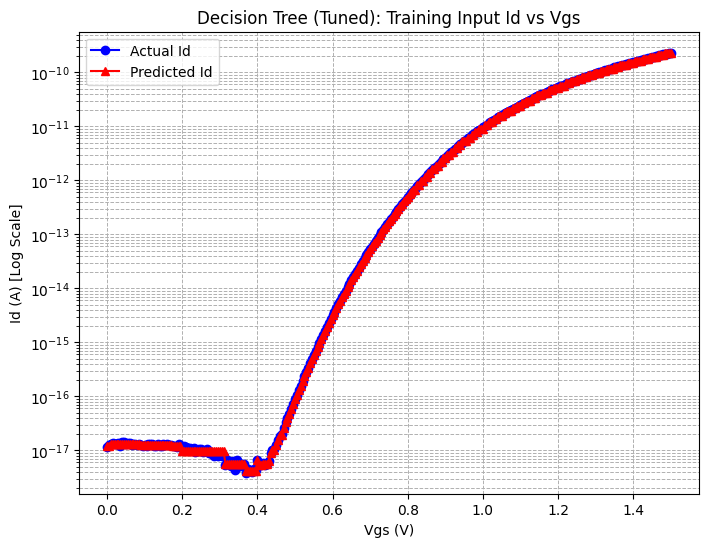

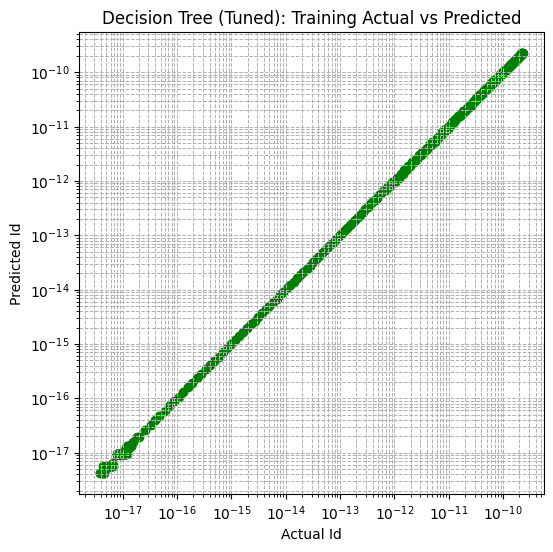

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# -------------------------------
# Load dataset
# -------------------------------
data = pd.read_excel("New Data.xlsx")

# -------------------------------
# Features and target
# -------------------------------
X = data[["Oxide Thickness", "Gate Length", "Work Function", "Vds", "Vgs"]]
y = data["Id"]

# Ensure numeric and positive for log-transform
y = pd.to_numeric(y, errors='coerce').fillna(1e-30)
y = y.clip(lower=1e-30)

# Log-transform target for stability
y_log = np.log10(y)

# -------------------------------
# Hyperparameter tuning with GridSearchCV
# -------------------------------
param_grid = {
    "max_depth": [4, 6, 8, 10, 12, None],   # control complexity
    "min_samples_leaf": [1, 2, 3, 5, 10]    # prevent overfitting
}

grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1
)
grid.fit(X, y_log)

print("Best parameters:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

# Use the best model
dt_model = grid.best_estimator_

# -------------------------------
# Training Input Data to Predict
# -------------------------------
oxide_train = 1
gate_train = 30
work_func_train = 4.5
vds_train = 0.5
vgs_train = np.arange(0, 1.505, 0.005)

#actual_train = np.array([
#    1.1354775190e-17,1.1628715300e-17,1.1641576830e-17,1.0779817070e-17,
#    1.0753521660e-17,8.9910337400e-18,7.4896285650e-18,5.5182756600e-18,
#    4.5912478100e-18,4.1733242480e-18,4.1339591990e-18,3.4940872270e-18,
#    4.3684548800e-18,7.8796802850e-18,2.8713554800e-17,1.1751989670e-16,
#    4.4451106560e-16,1.4561371680e-15,4.1587905030e-15,1.0563884810e-14,
#    2.4317689150e-14,5.1423362860e-14,1.0112255060e-13,1.8670967060e-13,
#    3.2620999620e-13,5.4306324700e-13,8.6637948760e-13,1.3311404610e-12,
#    1.9777071370e-12,2.8520417590e-12,4.0055173390e-12
#])

actual_train = np.array([
    1.1681150530e-17, 1.2477430120e-17, 1.3208439280e-17, 1.3521717520e-17,
    1.3365048460e-17, 1.3012568060e-17, 1.3978551020e-17, 1.2190120530e-17,
    1.4148214580e-17, 1.4017653880e-17, 1.3286604970e-17, 1.3978452160e-17,
    1.3508485170e-17, 1.2751328170e-17, 1.3312634530e-17, 1.3364831320e-17,
    1.2751269440e-17, 1.3064548140e-17, 1.2790392720e-17, 1.1994073630e-17,
    1.2372622880e-17, 1.2163738010e-17, 1.3325532870e-17, 1.3090539870e-17,
    1.3103574650e-17, 1.2111444350e-17, 1.2046154640e-17, 1.3286274190e-17,
    1.2215819410e-17, 1.2033042950e-17, 1.3247054390e-17, 1.2398519260e-17,
    1.2894555670e-17, 1.2737887490e-17, 1.2346245670e-17, 1.1837117040e-17,
    1.2280937170e-17, 1.1771808590e-17, 1.2998874310e-17, 1.1523742930e-17,
    1.0897127570e-17, 1.1967544240e-17, 1.1745605790e-17, 1.1210369130e-17,
    1.1184242100e-17, 1.0400977720e-17, 1.1275583090e-17, 9.3957749790e-18,
    9.6698921260e-18, 1.0440064800e-17, 1.0531424670e-17, 9.5131867110e-18,
    9.6437088850e-18, 1.0426935690e-17, 9.1215077170e-18, 8.8995694190e-18,
    8.4034951870e-18, 7.8290964040e-18, 8.1032136270e-18, 7.9595998950e-18,
    8.0901221030e-18, 7.8812379070e-18, 7.8290028170e-18, 5.3225983550e-18,
    6.6932593210e-18, 6.3277259930e-18, 5.0875684660e-18, 6.2363098300e-18,
    4.3826099350e-18, 6.7192736750e-18, 5.0874933150e-18, 5.2049613130e-18,
    5.6357275040e-18, 5.5834922520e-18, 3.8603331490e-18, 4.5521811030e-18,
    4.1213770790e-18, 3.8994384970e-18, 4.5260158780e-18, 4.2910231200e-18,
    6.5493619580e-18, 5.5572317460e-18, 5.2830765600e-18, 5.7921668580e-18,
    5.3744165360e-18, 5.6354789500e-18, 6.2620558780e-18, 9.0556120640e-18,
    1.0178244340e-17, 1.0452360530e-17, 1.2488779100e-17, 1.5856714990e-17,
    1.8650270700e-17, 2.0321174370e-17, 2.6104117000e-17, 3.2905278710e-17,
    3.9758656660e-17, 4.7160306330e-17, 5.9183104550e-17, 7.1780282660e-17,
    8.8110931020e-17, 1.0716988450e-16, 1.3139825830e-16, 1.5830272090e-16,
    1.9326155820e-16, 2.3384670910e-16, 2.8244707240e-16, 3.3957175770e-16,
    4.0926753370e-16, 4.9118193970e-16, 5.8716865700e-16, 7.0072618220e-16,
    8.3550966120e-16, 9.9411685830e-16, 1.1793935660e-15, 1.3961436890e-15,
    1.6505679220e-15, 1.9481228760e-15, 2.2949439740e-15, 2.6939683860e-15,
    3.1590334510e-15, 3.6980107850e-15, 4.3183412230e-15, 5.0342928850e-15,
    5.8585804590e-15, 6.8047018750e-15, 7.8886353430e-15, 9.1328991710e-15,
    1.0548197720e-14, 1.2168380240e-14, 1.4015978100e-14, 1.6107726650e-14,
    1.8496729930e-14, 2.1186643100e-14, 2.4244642500e-14, 2.7690374550e-14,
    3.1587099370e-14, 3.5981354820e-14, 4.0907969200e-14, 4.6460383710e-14,
    5.2656874080e-14, 5.9623869190e-14, 6.7390283860e-14, 7.6079531470e-14,
    8.5754624140e-14, 9.6524511310e-14, 1.0850003530e-13, 1.2177551190e-13,
    1.3650862150e-13, 1.5276656650e-13, 1.7072638670e-13, 1.9056129670e-13,
    2.1239506230e-13, 2.3640263460e-13, 2.6277090890e-13, 2.9168325620e-13,
    3.2333136260e-13, 3.5797426060e-13, 3.9586452070e-13, 4.3701874770e-13,
    4.8200215780e-13, 5.3073907630e-13, 5.8381418310e-13, 6.4142114850e-13,
    7.0376609680e-13, 7.7128837640e-13, 8.4424735910e-13, 9.2288224820e-13,
    1.0076664890e-12, 1.0989273100e-12, 1.1971998350e-12, 1.3026060440e-12,
    1.4158101670e-12, 1.5370170750e-12, 1.6668316950e-12, 1.8056682990e-12,
    1.9538712660e-12, 2.1120027580e-12, 2.2801854180e-12, 2.4591609010e-12,
    2.6494440610e-12, 2.8515277160e-12, 3.0664334010e-12, 3.2942020010e-12,
    3.5339752490e-12, 3.7874157790e-12, 4.0563314260e-12, 4.3406089860e-12,
    4.6402823720e-12, 4.9524129130e-12, 5.2835291180e-12, 5.6329097730e-12,
    5.9988100160e-12, 6.3793511940e-12, 6.7814264030e-12, 7.2031755650e-12,
    7.6420109940e-12, 8.1020170930e-12, 8.5829115410e-12, 9.0839995340e-12,
    9.6072126210e-12, 1.0151893610e-11, 1.0718505780e-11, 1.1308636930e-11,
    1.1923245290e-11, 1.2560695840e-11, 1.3222430270e-11, 1.3910544700e-11,
    1.4622090280e-11, 1.5358870180e-11, 1.6123995990e-11, 1.6913354940e-11,
    1.7734142310e-11, 1.8578027650e-11, 1.9452290230e-11, 2.0355258540e-11,
    2.1283503680e-11, 2.2247214130e-11, 2.3233778690e-11, 2.4257055320e-11,
    2.5303103880e-11, 2.6388807050e-11, 2.7497492510e-11, 2.8647369600e-11,
    2.9817063050e-11, 3.1030462610e-11, 3.2265130630e-11, 3.3543035340e-11,
    3.4847099810e-11, 3.6187811730e-11, 3.7563780750e-11, 3.8969443730e-11,
    4.0415364080e-11, 4.1893370090e-11, 4.3407509280e-11, 4.4950258120e-11,
    4.6543104730e-11, 4.8152062520e-11, 4.9817837750e-11, 5.1507081950e-11,
    5.3234781340e-11, 5.5003175400e-11, 5.6807372760e-11, 5.8644664340e-11,
    6.0526533740e-11, 6.2438533040e-11, 6.4394111920e-11, 6.6387263060e-11,
    6.8415534880e-11, 7.0491341230e-11, 7.2590451200e-11, 7.4743921980e-11,
    7.6924365600e-11, 7.9153811070e-11, 8.1419589310e-11, 8.3718990450e-11,
    8.6078512460e-11, 8.8451376500e-11, 9.0874594040e-11, 9.3346744650e-11,
    9.5841489750e-11, 9.8402091650e-11, 1.0099028950e-10, 1.0361417200e-10,
    1.0629083830e-10, 1.0898711480e-10, 1.1173925030e-10, 1.1453207970e-10,
    1.1736749200e-10, 1.2026512590e-10, 1.2319223520e-10, 1.2613477940e-10,
    1.2914115210e-10, 1.3217124270e-10, 1.3524679600e-10, 1.3839732400e-10,
    1.4161107020e-10, 1.4481828570e-10, 1.4805940860e-10, 1.5135143170e-10,
    1.5467982770e-10, 1.5807077970e-10, 1.6154814190e-10, 1.6504284130e-10,
    1.6854070530e-10, 1.7207813300e-10, 1.7567494110e-10, 1.7934137500e-10,
    1.8307988390e-10, 1.8680748470e-10, 1.9059742160e-10, 1.9440949150e-10,
    1.9825885700e-10, 2.0221756390e-10, 2.0621279580e-10, 2.1021663810e-10,
    2.1423360480e-10, 2.1831567620e-10, 2.2249141060e-10, 2.2672226870e-10,
    2.3095670650e-10
])

X_train_input = pd.DataFrame({
    "Oxide Thickness": [oxide_train]*len(vgs_train),
    "Gate Length": [gate_train]*len(vgs_train),
    "Work Function": [work_func_train]*len(vgs_train),
    "Vds": [vds_train]*len(vgs_train),
    "Vgs": vgs_train
})

# Predict training input
pred_train_log = dt_model.predict(X_train_input)
pred_train = 10**pred_train_log

# -------------------------------
# Training Performance
# -------------------------------
r2_train = r2_score(actual_train, pred_train)
mse_train = mean_squared_error(actual_train, pred_train)

print("Training Input R²:", r2_train)
print("Training Input MSE:", mse_train)

# -------------------------------
# Save Training Results
# -------------------------------
df_train = pd.DataFrame({
    "Vgs": vgs_train,
    "Actual_Id": actual_train,
    "Predicted_Id": pred_train
})
df_train.to_excel("DT_Training_Input_Predictions_Tuned.xlsx", index=False)

# -------------------------------
# Line Plot: Training Input
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(vgs_train, actual_train, "bo-", label="Actual Id")
plt.plot(vgs_train, pred_train, "r^-", label="Predicted Id")
plt.yscale("log")
plt.xlabel("Vgs (V)")
plt.ylabel("Id (A) [Log Scale]")
plt.title("Decision Tree (Tuned): Training Input Id vs Vgs")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()

# -------------------------------
# Scatter Plot: Actual vs Predicted
# -------------------------------
plt.figure(figsize=(6,6))
plt.scatter(actual_train, pred_train, color="green")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Actual Id")
plt.ylabel("Predicted Id")
plt.title("Decision Tree (Tuned): Training Actual vs Predicted")
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Parameters: {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training R²: 0.9983084685193284
Training MSE: 1.3112618325865513e-13
Training MAPE: 0.01393522963434651


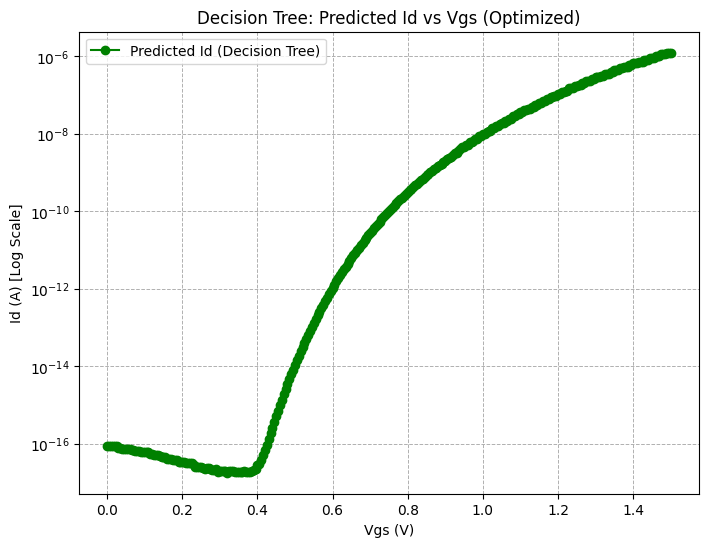

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

# -------------------------------
# Load dataset
# -------------------------------
data = pd.read_excel("New Data.xlsx")

# Features and Target
X = data[["Oxide Thickness", "Gate Length", "Work Function", "Vds", "Vgs"]]
y = data["Id"]

# Ensure numeric and positive
y = pd.to_numeric(y, errors="coerce").fillna(1e-30)
y = y.clip(lower=1e-30)

# Log-transform target for stability
y_log = np.log10(y)

# -------------------------------
# Grid Search for Best Hyperparameters
# -------------------------------
param_grid = {
    "max_depth": [5, 8, 12, 15, 20, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}

grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid.fit(X, y_log)

print("Best Parameters:", grid.best_params_)

# Best Decision Tree model
best_dt = grid.best_estimator_

# -------------------------------
# Training Evaluation
# -------------------------------
y_pred_log = best_dt.predict(X)
y_pred = 10**y_pred_log  # inverse log-transform

r2_train = r2_score(y, y_pred)
mse_train = mean_squared_error(y, y_pred)
mape_train = mean_absolute_percentage_error(y, y_pred)

print("Training R²:", r2_train)
print("Training MSE:", mse_train)
print("Training MAPE:", mape_train)

# -------------------------------
# Testing Input Prediction
# -------------------------------
oxide_test = 1
gate_test = 40
work_func_test = 4.55
vds_test = 1.0
vgs_test = np.arange(0, 1.505, 0.005)

X_test = pd.DataFrame({
    "Oxide Thickness": [oxide_test]*len(vgs_test),
    "Gate Length": [gate_test]*len(vgs_test),
    "Work Function": [work_func_test]*len(vgs_test),
    "Vds": [vds_test]*len(vgs_test),
    "Vgs": vgs_test
})

pred_test_log = best_dt.predict(X_test)
pred_test = 10**pred_test_log

# -------------------------------
# Plot Id vs Vgs
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(vgs_test, pred_test, "go-", label="Predicted Id (Decision Tree)")
plt.yscale("log")
plt.xlabel("Vgs (V)")
plt.ylabel("Id (A) [Log Scale]")
plt.title("Decision Tree: Predicted Id vs Vgs (Optimized)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()

# -------------------------------
# Save Predictions
# -------------------------------
df_test = pd.DataFrame({
    "Vgs": vgs_test,
    "Predicted_Id": pred_test
})
df_test.to_excel("DecisionTree_Testing_Input_Predictions_Optimized.xlsx", index=False)


Comparison R²: 0.8950504865037616
Comparison MSE: 1.3577295668432903e-14
Comparison MAPE: 0.4407888518594122


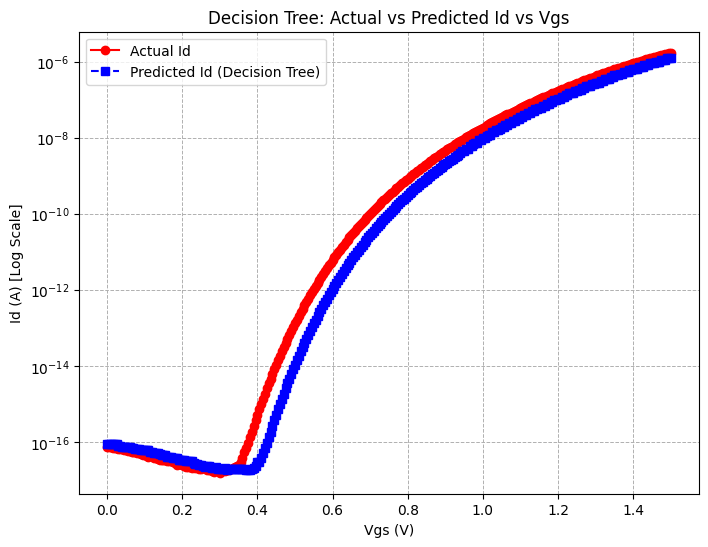

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# -------------------------------
# Actual Id values (given)
# -------------------------------

actual_Id = np.array([
7.4841820620e-17, 7.5729458880e-17, 7.4763416160e-17, 7.1095176460e-17,
6.9750565330e-17, 6.8706198470e-17, 6.7452966250e-17, 6.4789892190e-17,
6.4672366280e-17, 6.3745486770e-17, 6.0964926270e-17, 6.0403561600e-17,
5.7257486770e-17, 5.6343661860e-17, 5.4215806490e-17, 5.6513288560e-17,
5.1461316740e-17, 5.1617927910e-17, 5.0377751320e-17, 4.5012481660e-17,
4.6866125200e-17, 4.4646892040e-17, 4.2075198510e-17, 4.3250029610e-17,
4.3093343400e-17, 3.8589644560e-17, 3.8145768550e-17, 3.7140566700e-17,
3.4934388460e-17, 3.4151106400e-17, 3.3067580330e-17, 3.4647089220e-17,
3.2375640980e-17, 3.1370439800e-17, 3.1788134810e-17, 2.9921363760e-17,
2.7884889620e-17, 2.4634385000e-17, 2.7506249810e-17, 2.6970996620e-17,
2.4699549260e-17, 2.4294837200e-17, 2.2049498230e-17, 2.2480248310e-17,
2.2806565740e-17, 2.1592500380e-17, 2.2414873540e-17, 2.1187754290e-17,
2.2741156820e-17, 1.9895330330e-17, 1.9869187890e-17, 2.1618402110e-17,
2.0978717520e-17, 1.8955299250e-17, 1.8380885320e-17, 1.9333800300e-17,
1.7989195120e-17, 1.6500995020e-17, 1.9255375040e-17, 1.8537366580e-17,
1.5769865720e-17, 1.7741000480e-17, 1.9490215760e-17, 1.7910637580e-17,
1.8654687930e-17, 1.9124602440e-17, 1.9946977530e-17, 2.0651865880e-17,
2.2139999870e-17, 2.3432322550e-17, 2.5729810440e-17, 3.0585900520e-17,
3.7687294580e-17, 5.4840339850e-17, 7.0687975960e-17, 9.7540212040e-17,
1.3504458760e-16, 1.8954539140e-16, 2.6574209690e-16, 3.7513535940e-16,
5.2311651900e-16, 7.2800046730e-16, 1.0113656190e-15, 1.3936807910e-15,
1.9069546180e-15, 2.5940175760e-15, 3.5055325990e-15, 4.7032324890e-15,
6.2795793820e-15, 8.3331186220e-15, 1.0991414800e-14, 1.4425228500e-14,
1.8825175570e-14, 2.4447272880e-14, 3.1582326440e-14, 4.0606307170e-14,
5.1959085760e-14, 6.6190761660e-14, 8.3958725920e-14, 1.0602459340e-13,
1.3325058700e-13, 1.6692402290e-13, 2.0824992440e-13, 2.5871053150e-13,
3.2019672950e-13, 3.9491699650e-13, 4.8532645510e-13, 5.9416604670e-13,
7.2522286810e-13, 8.8187591890e-13, 1.0692704560e-12, 1.2921441240e-12,
1.5562612050e-12, 1.8687311390e-12, 2.2371542040e-12, 2.6711737160e-12,
3.1799308970e-12, 3.7740044700e-12, 4.4681373730e-12, 5.2744735810e-12,
6.2107476530e-12, 7.2954051650e-12, 8.5428724690e-12, 9.9862174200e-12,
1.1645190870e-11, 1.3541178750e-11, 1.5711376850e-11, 1.8189645450e-11,
2.1017862890e-11, 2.4227523380e-11, 2.7865610200e-11, 3.1993895310e-11,
3.6651164940e-11, 4.1918224660e-11, 4.7828238610e-11, 5.4462485190e-11,
6.1940898010e-11, 7.0300849590e-11, 7.9634280910e-11, 9.0057945370e-11,
1.0168898020e-10, 1.1462649450e-10, 1.2901269340e-10, 1.4492437310e-10,
1.6260474640e-10, 1.8216797380e-10, 2.0374829410e-10, 2.2757628290e-10,
2.5382557700e-10, 2.8269776270e-10, 3.1450882900e-10, 3.4938129450e-10,
3.8755948060e-10, 4.2949561090e-10, 4.7523839400e-10, 5.2538232880e-10,
5.7999527940e-10, 6.3953282380e-10, 7.0447272650e-10, 7.7508618700e-10,
8.5202092560e-10, 9.3526501320e-10, 1.0258243780e-09, 1.1238626380e-09,
1.2300897400e-09, 1.3452296530e-09, 1.4694345650e-09, 1.6037145900e-09,
1.7486321650e-09, 1.9050189740e-09, 2.0734125210e-09, 2.2548756430e-09,
2.4497729190e-09, 2.6597034060e-09, 2.8846327520e-09, 3.1270324570e-09,
3.3864876330e-09, 3.6645209590e-09, 3.9625347810e-09, 4.2815161870e-09,
4.6235384830e-09, 4.9877659910e-09, 5.3777731090e-09, 5.7942148630e-09,
6.2392673430e-09, 6.7119006810e-09, 7.2174089890e-09, 7.7551297570e-09,
8.3288247010e-09, 8.9368670060e-09, 9.5857216170e-09, 1.0276108110e-08,
1.1005115680e-08, 1.1783685950e-08, 1.2606825960e-08, 1.3482750760e-08,
1.4408109160e-08, 1.5391342070e-08, 1.6432380870e-08, 1.7530280880e-08,
1.8699785590e-08, 1.9927373210e-08, 2.1232676000e-08, 2.2605273250e-08,
2.4063534820e-08, 2.5592100100e-08, 2.7215608710e-08, 2.8921403650e-08,
3.0721401080e-08, 3.2617809700e-08, 3.4615552870e-08, 3.6718287020e-08,
3.8938573740e-08, 4.1266371780e-08, 4.3721906870e-08, 4.6294230410e-08,
4.9006571260e-08, 5.1848880890e-08, 5.4837970020e-08, 5.7980462800e-08,
6.1268611470e-08, 6.4724016790e-08, 6.8353714970e-08, 7.2140685310e-08,
7.6133477320e-08, 8.0301145030e-08, 8.4669506970e-08, 8.9235166130e-08,
9.4028261460e-08, 9.9029890260e-08, 1.0427949450e-07, 1.0974315640e-07,
1.1547273980e-07, 1.2145901920e-07, 1.2770773580e-07, 1.3424047640e-07,
1.4103756400e-07, 1.4816704020e-07, 1.5556692810e-07, 1.6332217080e-07,
1.7139271970e-07, 1.7980056380e-07, 1.8856715370e-07, 1.9769303440e-07,
2.0721220150e-07, 2.1710967600e-07, 2.2741279390e-07, 2.3812964300e-07,
2.4928263010e-07, 2.6086127120e-07, 2.7290660640e-07, 2.8542906520e-07,
2.9841420330e-07, 3.1190696570e-07, 3.2591233190e-07, 3.4041278910e-07,
3.5548657890e-07, 3.7109351570e-07, 3.8722928720e-07, 4.0398387430e-07,
4.2130847300e-07, 4.3930128010e-07, 4.5778720650e-07, 4.7692522350e-07,
4.9679106020e-07, 5.1731149540e-07, 5.3840476110e-07, 5.6019368320e-07,
5.8269189130e-07, 6.0598740990e-07, 6.2996312300e-07, 6.5463292710e-07,
6.8003058950e-07, 7.0618877280e-07, 7.3314054070e-07, 7.6082368160e-07,
7.8934059910e-07, 8.1870136560e-07, 8.4887415650e-07, 8.7982478780e-07,
9.1159365090e-07, 9.4424900010e-07, 9.7772346710e-07, 1.0120941040e-06,
1.0473317300e-06, 1.0834662510e-06, 1.1204814380e-06, 1.1583406610e-06,
1.1971630930e-06, 1.2368060730e-06, 1.2774772670e-06, 1.3190329440e-06,
1.3615814500e-06, 1.4049823740e-06, 1.4494065360e-06, 1.4947453930e-06,
1.5411197450e-06, 1.5883613450e-06, 1.6366937760e-06, 1.6859227860e-06,
1.7361942070e-06
])

# -------------------------------
# Load Predicted Id values from saved Excel
# -------------------------------
pred_df = pd.read_excel("DecisionTree_Testing_Input_Predictions_Optimized.xlsx")
pred_Id = pred_df["Predicted_Id"].values
vgs_test = pred_df["Vgs"].values

# Ensure both arrays have same length
pred_Id = pred_Id[:len(actual_Id)]
vgs_test = vgs_test[:len(actual_Id)]

# -------------------------------
# Merge Actual and Predicted
# -------------------------------
df_compare = pd.DataFrame({
    "Vgs": vgs_test,
    "Actual_Id": actual_Id,
    "Predicted_Id": pred_Id
})

# -------------------------------
# Calculate Metrics
# -------------------------------
r2 = r2_score(df_compare["Actual_Id"], df_compare["Predicted_Id"])
mse = mean_squared_error(df_compare["Actual_Id"], df_compare["Predicted_Id"])
mape = mean_absolute_percentage_error(df_compare["Actual_Id"], df_compare["Predicted_Id"])

print("Comparison R²:", r2)
print("Comparison MSE:", mse)
print("Comparison MAPE:", mape)

# -------------------------------
# Plot Actual vs Predicted Id (Log Scale)
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(df_compare["Vgs"], df_compare["Actual_Id"], "ro-", label="Actual Id")
plt.plot(df_compare["Vgs"], df_compare["Predicted_Id"], "bs--", label="Predicted Id (Decision Tree)")
plt.yscale("log")
plt.xlabel("Vgs (V)")
plt.ylabel("Id (A) [Log Scale]")
plt.title("Decision Tree: Actual vs Predicted Id vs Vgs")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()

# -------------------------------
# Save merged results
# -------------------------------
df_compare.to_excel("DecisionTree_Actual_vs_Predicted_Id.xlsx", index=False)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Parameters: {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training R²: 0.9983084685193284
Training MSE: 1.3112618325865513e-13
Training MAPE: 0.01393522963434651


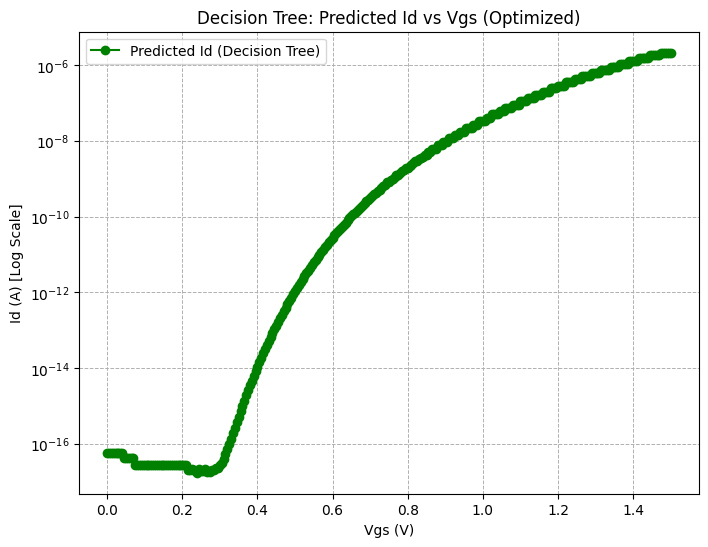

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

# -------------------------------
# Load dataset
# -------------------------------
data = pd.read_excel("New Data.xlsx")

# Features and Target
X = data[["Oxide Thickness", "Gate Length", "Work Function", "Vds", "Vgs"]]
y = data["Id"]

# Ensure numeric and positive
y = pd.to_numeric(y, errors="coerce").fillna(1e-30)
y = y.clip(lower=1e-30)

# Log-transform target for stability
y_log = np.log10(y)

# -------------------------------
# Grid Search for Best Hyperparameters
# -------------------------------
param_grid = {
    "max_depth": [5, 8, 12, 15, 20, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}

grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid.fit(X, y_log)

print("Best Parameters:", grid.best_params_)

# Best Decision Tree model
best_dt = grid.best_estimator_

# -------------------------------
# Training Evaluation
# -------------------------------
y_pred_log = best_dt.predict(X)
y_pred = 10**y_pred_log  # inverse log-transform

r2_train = r2_score(y, y_pred)
mse_train = mean_squared_error(y, y_pred)
mape_train = mean_absolute_percentage_error(y, y_pred)

print("Training R²:", r2_train)
print("Training MSE:", mse_train)
print("Training MAPE:", mape_train)

# -------------------------------
# Testing Input Prediction
# -------------------------------
oxide_test = 1
gate_test = 45
work_func_test = 4.5
vds_test = 1.0
vgs_test = np.arange(0, 1.505, 0.005)

X_test = pd.DataFrame({
    "Oxide Thickness": [oxide_test]*len(vgs_test),
    "Gate Length": [gate_test]*len(vgs_test),
    "Work Function": [work_func_test]*len(vgs_test),
    "Vds": [vds_test]*len(vgs_test),
    "Vgs": vgs_test
})

pred_test_log = best_dt.predict(X_test)
pred_test = 10**pred_test_log

# -------------------------------
# Plot Id vs Vgs
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(vgs_test, pred_test, "go-", label="Predicted Id (Decision Tree)")
plt.yscale("log")
plt.xlabel("Vgs (V)")
plt.ylabel("Id (A) [Log Scale]")
plt.title("Decision Tree: Predicted Id vs Vgs (Optimized)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()

# -------------------------------
# Save Predictions
# -------------------------------
df_test = pd.DataFrame({
    "Vgs": vgs_test,
    "Predicted_Id": pred_test
})
df_test.to_excel("DecisionTree_Testing_Input_Predictions_Optimized_Gate.xlsx", index=False)


Comparison R²: -0.052214962714079105
Comparison MSE: 3.917124670717134e-11
Comparison MAPE: 0.7996174986489673


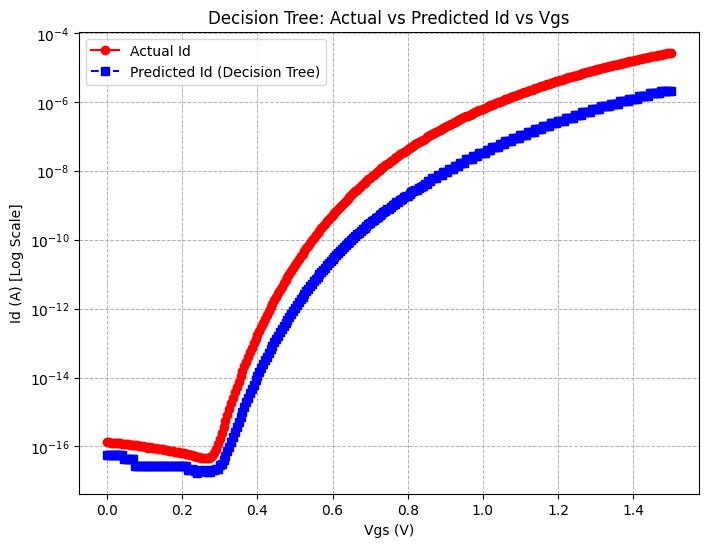

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# -------------------------------
# Actual Id values (given)
# -------------------------------

actual_Id = np.array([
    1.3110652870e-16, 1.3093677430e-16, 1.2785595740e-16, 1.2596306310e-16,
    1.2391352000e-16, 1.2360017130e-16, 1.2249052320e-16, 1.2242520270e-16,
    1.1759513860e-16, 1.1700765480e-16, 1.1652460390e-16, 1.1504944220e-16,
    1.0976248570e-16, 1.0845702750e-16, 1.0956657670e-16, 1.0833944350e-16,
    1.0691649910e-16, 1.0407065880e-16, 1.0236052470e-16, 1.0023265980e-16,
    9.8874986620e-17, 9.6224958440e-17, 9.1708195220e-17, 9.4110101140e-17,
    9.2178048570e-17, 9.1068403980e-17, 8.7857050700e-17, 8.6251350960e-17,
    8.4502056360e-17, 8.3105222440e-17, 8.1786713230e-17, 7.7935710270e-17,
    7.6930499610e-17, 7.4345743940e-17, 7.5141998360e-17, 7.5311656500e-17,
    7.1395383900e-17, 6.9123927090e-17, 6.7074390020e-17, 6.6460803260e-17,
    6.6212731240e-17, 6.2688082200e-17, 5.9881408390e-17, 5.9293930430e-17,
    5.8288721670e-17, 5.7335729430e-17, 5.4189649830e-17, 5.3602172480e-17,
    5.0103632670e-17, 4.7884394070e-17, 4.7571053100e-17, 4.6004519400e-17,
    4.5730340990e-17, 4.6461327840e-17, 4.6265474270e-17, 4.9842253540e-17,
    5.3562627960e-17, 6.5076295660e-17, 8.3717497940e-17, 1.1415959990e-16,
    1.6460057140e-16, 2.4026204960e-16, 3.6212196080e-16, 5.3827384220e-16,
    8.0610461460e-16, 1.2007950570e-15, 1.7732691830e-15, 2.5944368230e-15,
    3.7652974900e-15, 5.4114576600e-15, 7.7120586420e-15, 1.0899554660e-14,
    1.5277583900e-14, 2.1231712040e-14, 2.9301490820e-14, 4.0139559600e-14,
    5.4606548560e-14, 7.3776352630e-14, 9.9057625850e-14, 1.3217567540e-13,
    1.7534136850e-13, 2.3130867470e-13, 3.0347873340e-13, 3.9596208250e-13,
    5.1425747130e-13, 6.6427023160e-13, 8.5461712180e-13, 1.0936042260e-12,
    1.3941746110e-12, 1.7679049600e-12, 2.2335981270e-12, 2.8114533600e-12,
    3.5234147200e-12, 4.3993185360e-12, 5.4711044650e-12, 6.7774550070e-12,
    8.3700781260e-12, 1.0296704370e-11, 1.2618755820e-11, 1.5425407970e-11,
    1.8792482560e-11, 2.2810178390e-11, 2.7601187680e-11, 3.3295874470e-11,
    4.0055669090e-11, 4.8034751240e-11, 5.7441024360e-11, 6.8513159620e-11,
    8.1477859520e-11, 9.6571656870e-11, 1.1424698620e-10, 1.3479351490e-10,
    1.5863632230e-10, 1.8613441780e-10, 2.1794376910e-10, 2.5458821570e-10,
    2.9670341690e-10, 3.4491392770e-10, 4.0008413090e-10, 4.6316449400e-10,
    5.3497831630e-10, 6.1620756080e-10, 7.0884887560e-10, 8.1378522340e-10,
    9.3186848760e-10, 1.0651172390e-09, 1.2156684480e-09, 1.3841370190e-09,
    1.5732443990e-09, 1.7852648580e-09, 2.0215613070e-09, 2.2861900080e-09,
    2.5806029140e-09, 2.9068694620e-09, 3.2704557880e-09, 3.6735483390e-09,
    4.1185567200e-09, 4.6118903570e-09, 5.1554833030e-09, 5.7545361150e-09,
    6.4148494660e-09, 7.1389219810e-09, 7.9343582520e-09, 8.8056572410e-09,
    9.7602531960e-09, 1.0804715350e-08, 1.1943847040e-08, 1.3184154230e-08,
    1.4542435550e-08, 1.6010677640e-08, 1.7612023940e-08, 1.9351690660e-08,
    2.1231981440e-08, 2.3273474930e-08, 2.5482373450e-08, 2.7866370370e-08,
    3.0446876030e-08, 3.3223405960e-08, 3.6222471870e-08, 3.9445745180e-08,
    4.2912246230e-08, 4.6643706780e-08, 5.0644673360e-08, 5.4937429190e-08,
    5.9533990360e-08, 6.4463188540e-08, 6.9734138040e-08, 7.5360356920e-08,
    8.1397791450e-08, 8.7803635380e-08, 9.4664657180e-08, 1.0195817810e-07,
    1.0974037980e-07, 1.1801113560e-07, 1.2680500340e-07, 1.3614678320e-07,
    1.4607271080e-07, 1.5659471880e-07, 1.6775033970e-07, 1.7959391390e-07,
    1.9210855970e-07, 2.0539559290e-07, 2.1939069050e-07, 2.3420833630e-07,
    2.4986337880e-07, 2.6638294000e-07, 2.8384543670e-07, 3.0219766650e-07,
    3.2156476750e-07, 3.4198224040e-07, 3.6343338520e-07, 3.8607433600e-07,
    4.0980202480e-07, 4.3478541140e-07, 4.6102527100e-07, 4.8855542640e-07,
    5.1749090270e-07, 5.4779791930e-07, 5.7962603010e-07, 6.1291366940e-07,
    6.4785809560e-07, 6.8430738760e-07, 7.2259965750e-07, 7.6255138960e-07,
    8.0439862370e-07, 8.4813642390e-07, 8.9379422920e-07, 9.4141093640e-07,
    9.9129470080e-07, 1.0430239140e-06, 1.0974288960e-06, 1.1537269720e-06,
    1.2125748340e-06, 1.2740116220e-06, 1.3377039510e-06, 1.4044095600e-06,
    1.4735059210e-06, 1.5454970220e-06, 1.6203732490e-06, 1.6980897520e-06,
    1.7791832180e-06, 1.8630235350e-06, 1.9504090530e-06, 2.0408231350e-06,
    2.1351320270e-06, 2.2325893730e-06, 2.3336580910e-06, 2.4387218490e-06,
    2.5474803420e-06, 2.6601189960e-06, 2.7769553750e-06, 2.8980669180e-06,
    3.0228146020e-06, 3.1531557450e-06, 3.2867012230e-06, 3.4254859830e-06,
    3.5691162670e-06, 3.7170373500e-06, 3.8704199340e-06, 4.0287067240e-06,
    4.1922475240e-06, 4.3607751060e-06, 4.5350980260e-06, 4.7148382140e-06,
    4.8999608920e-06, 5.0909749750e-06, 5.2880633980e-06, 5.4911527680e-06,
    5.6996905680e-06, 5.9149708770e-06, 6.1366183300e-06, 6.3643299720e-06,
    6.5982498510e-06, 6.8397849780e-06, 7.0883137100e-06, 7.3430909320e-06,
    7.6045289160e-06, 7.8732236770e-06, 8.1487014960e-06, 8.4318817010e-06,
    8.7218976670e-06, 9.0194699320e-06, 9.3249928690e-06, 9.6382946670e-06,
    9.9593130610e-06, 1.0288053730e-05, 1.0625133530e-05, 1.0969741720e-05,
    1.1322944050e-05, 1.1684125180e-05, 1.2053748980e-05, 1.2432054530e-05,
    1.2819621400e-05, 1.3214729620e-05, 1.3617664050e-05, 1.4030599320e-05,
    1.4452933280e-05, 1.4881226400e-05, 1.5324522990e-05, 1.5770287610e-05,
    1.6228370820e-05, 1.6696067310e-05, 1.7171046380e-05, 1.7656983740e-05,
    1.8153000270e-05, 1.8656101910e-05, 1.9171969890e-05, 1.9694673260e-05,
    2.0227694810e-05, 2.0772730700e-05, 2.1324349790e-05, 2.1887608750e-05,
    2.2461636720e-05, 2.3046410940e-05, 2.3637402170e-05, 2.4241387950e-05,
    2.4854903330e-05, 2.5479372680e-05, 2.6112755210e-05, 2.6758845310e-05,
    2.7412128850e-05
])

# -------------------------------
# Load Predicted Id values from saved Excel
# -------------------------------
pred_df = pd.read_excel("DecisionTree_Testing_Input_Predictions_Optimized_Gate.xlsx")
pred_Id = pred_df["Predicted_Id"].values
vgs_test = pred_df["Vgs"].values

# Ensure both arrays have same length
pred_Id = pred_Id[:len(actual_Id)]
vgs_test = vgs_test[:len(actual_Id)]

# -------------------------------
# Merge Actual and Predicted
# -------------------------------
df_compare = pd.DataFrame({
    "Vgs": vgs_test,
    "Actual_Id": actual_Id,
    "Predicted_Id": pred_Id
})

# -------------------------------
# Calculate Metrics
# -------------------------------
r2 = r2_score(df_compare["Actual_Id"], df_compare["Predicted_Id"])
mse = mean_squared_error(df_compare["Actual_Id"], df_compare["Predicted_Id"])
mape = mean_absolute_percentage_error(df_compare["Actual_Id"], df_compare["Predicted_Id"])

print("Comparison R²:", r2)
print("Comparison MSE:", mse)
print("Comparison MAPE:", mape)

# -------------------------------
# Plot Actual vs Predicted Id (Log Scale)
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(df_compare["Vgs"], df_compare["Actual_Id"], "ro-", label="Actual Id")
plt.plot(df_compare["Vgs"], df_compare["Predicted_Id"], "bs--", label="Predicted Id (Decision Tree)")
plt.yscale("log")
plt.xlabel("Vgs (V)")
plt.ylabel("Id (A) [Log Scale]")
plt.title("Decision Tree: Actual vs Predicted Id vs Vgs")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()

# -------------------------------
# Save merged results
# -------------------------------
df_compare.to_excel("DecisionTree_Actual_vs_Predicted_Id.xlsx", index=False)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Parameters: {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training R²: 0.9983084685193284
Training MSE: 1.3112618325865513e-13
Training MAPE: 0.01393522963434651


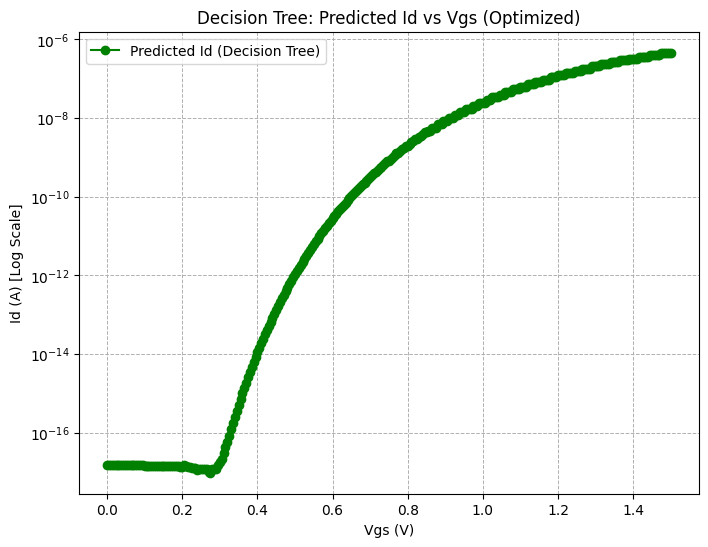

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

# -------------------------------
# Load dataset
# -------------------------------
data = pd.read_excel("New Data.xlsx")

# Features and Target
X = data[["Oxide Thickness", "Gate Length", "Work Function", "Vds", "Vgs"]]
y = data["Id"]

# Ensure numeric and positive
y = pd.to_numeric(y, errors="coerce").fillna(1e-30)
y = y.clip(lower=1e-30)

# Log-transform target for stability
y_log = np.log10(y)

# -------------------------------
# Grid Search for Best Hyperparameters
# -------------------------------
param_grid = {
    "max_depth": [5, 8, 12, 15, 20, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}

grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid.fit(X, y_log)

print("Best Parameters:", grid.best_params_)

# Best Decision Tree model
best_dt = grid.best_estimator_

# -------------------------------
# Training Evaluation
# -------------------------------
y_pred_log = best_dt.predict(X)
y_pred = 10**y_pred_log  # inverse log-transform

r2_train = r2_score(y, y_pred)
mse_train = mean_squared_error(y, y_pred)
mape_train = mean_absolute_percentage_error(y, y_pred)

print("Training R²:", r2_train)
print("Training MSE:", mse_train)
print("Training MAPE:", mape_train)

# -------------------------------
# Testing Input Prediction
# -------------------------------
oxide_test = 1
gate_test = 40
work_func_test = 4.5
vds_test = 0.75
vgs_test = np.arange(0, 1.505, 0.005)

X_test = pd.DataFrame({
    "Oxide Thickness": [oxide_test]*len(vgs_test),
    "Gate Length": [gate_test]*len(vgs_test),
    "Work Function": [work_func_test]*len(vgs_test),
    "Vds": [vds_test]*len(vgs_test),
    "Vgs": vgs_test
})

pred_test_log = best_dt.predict(X_test)
pred_test = 10**pred_test_log

# -------------------------------
# Plot Id vs Vgs
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(vgs_test, pred_test, "go-", label="Predicted Id (Decision Tree)")
plt.yscale("log")
plt.xlabel("Vgs (V)")
plt.ylabel("Id (A) [Log Scale]")
plt.title("Decision Tree: Predicted Id vs Vgs (Optimized)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()

# -------------------------------
# Save Predictions
# -------------------------------
df_test = pd.DataFrame({
    "Vgs": vgs_test,
    "Predicted_Id": pred_test
})
df_test.to_excel("DecisionTree_Testing_Input_Predictions_Optimized_Vds.xlsx", index=False)


Comparison R²: 0.5252103411580322
Comparison MSE: 4.423097644802207e-14
Comparison MAPE: 0.19556971791225247


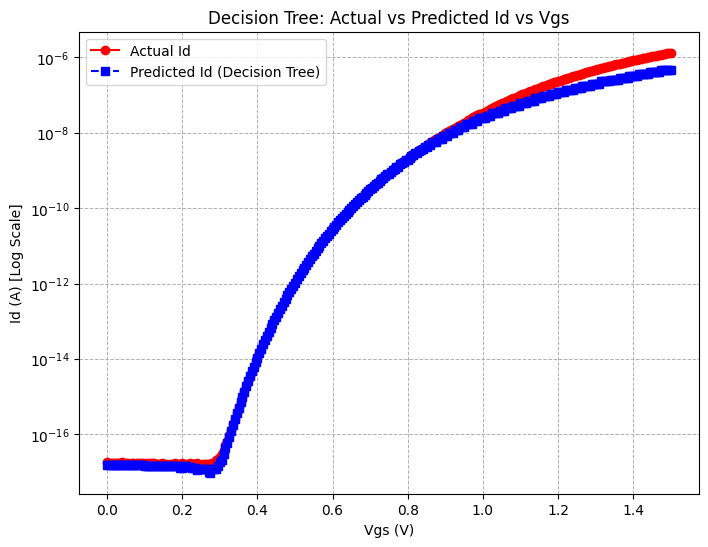

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# -------------------------------
# Actual Id values (given)
# -------------------------------

# Actual Id values (updated array)
actual_Id = np.array([
    1.8328467500e-17, 1.6748889130e-17, 1.7871507980e-17, 1.7558176760e-17,
    1.7492873390e-17, 1.7623381500e-17, 1.7714727420e-17, 1.7257801550e-17,
    1.8719827350e-17, 1.7257736550e-17, 1.7414353290e-17, 1.7087968700e-17,
    1.6892125120e-17, 1.7022633940e-17, 1.7257575580e-17, 1.6774542230e-17,
    1.7805783680e-17, 1.7792697830e-17, 1.7479367930e-17, 1.7688201820e-17,
    1.6239166050e-17, 1.7061542440e-17, 1.5912750970e-17, 1.6943993000e-17,
    1.7231151850e-17, 1.7231120740e-17, 1.6761142390e-17, 1.6199785480e-17,
    1.6904675600e-17, 1.7152672560e-17, 1.5951665360e-17, 1.6747934360e-17,
    1.6238794200e-17, 1.5259706790e-17, 1.6395382420e-17, 1.6434514370e-17,
    1.7074134640e-17, 1.5507613370e-17, 1.6786884310e-17, 1.5742526890e-17,
    1.7557015760e-17, 1.6447388020e-17, 1.4802542560e-17, 1.6812843040e-17,
    1.7021678840e-17, 1.5951213650e-17, 1.6238374140e-17, 1.6799670640e-17,
    1.7021560810e-17, 1.5807500880e-17, 1.5415848840e-17, 1.6225173370e-17,
    1.6512334260e-17, 1.6055411960e-17, 1.6577546650e-17, 1.6329489950e-17,
    1.7138814800e-17, 1.7556516940e-17, 2.0415334420e-17, 2.1720714970e-17,
    2.4514262110e-17, 3.0375521020e-17, 3.8808436190e-17, 5.1040092290e-17,
    6.7292408910e-17, 9.4888731850e-17, 1.3270640920e-16, 1.8725943300e-16,
    2.6386081890e-16, 3.7214448700e-16, 5.2093500380e-16, 7.2654998470e-16,
    1.0074870790e-15, 1.3893453610e-15, 1.9018620540e-15, 2.5858573040e-15,
    3.4954272700e-15, 4.6942106530e-15, 6.2676073250e-15, 8.3155072000e-15,
    1.0972184670e-14, 1.4400058760e-14, 1.8795789370e-14, 2.4410028110e-14,
    3.1536909820e-14, 4.0544089930e-14, 5.1884780430e-14, 6.6097527910e-14,
    8.3844905860e-14, 1.0588281150e-13, 1.3308370210e-13, 1.6671823680e-13,
    2.0799981970e-13, 2.5840856290e-13, 3.1983104380e-13, 3.9447078010e-13,
    4.8480606530e-13, 5.9353592430e-13, 7.2445234890e-13, 8.8098181660e-13,
    1.0681132750e-12, 1.2907836910e-12, 1.5548165590e-12, 1.8670385440e-12,
    2.2350892800e-12, 2.6686713370e-12, 3.1770373390e-12, 3.7707465460e-12,
    4.4643323390e-12, 5.2698536190e-12, 6.2055917420e-12, 7.2895195170e-12,
    8.5357708060e-12, 9.9784287210e-12, 1.1635205840e-11, 1.3531098550e-11,
    1.5698815840e-11, 1.8176278970e-11, 2.1002932690e-11, 2.4210817660e-11,
    2.7846012260e-11, 3.1971473100e-11, 3.6624962010e-11, 4.1891072030e-11,
    4.7796086980e-11, 5.4427449230e-11, 6.1901855440e-11, 7.0255410200e-11,
    7.9584973070e-11, 9.0002409600e-11, 1.0162357840e-10, 1.1455843520e-10,
    1.2892972550e-10, 1.4483776390e-10, 1.6251281080e-10, 1.8205520550e-10,
    2.0363009780e-10, 2.2745290300e-10, 2.5368069250e-10, 2.8253894560e-10,
    3.1433627660e-10, 3.4917863340e-10, 3.8735680560e-10, 4.2926574460e-10,
    4.7499631890e-10, 5.2511290940e-10, 5.7966784250e-10, 6.3920742900e-10,
    7.0412757560e-10, 7.7468703260e-10, 8.5154168350e-10, 9.3481391090e-10,
    1.0253209440e-09, 1.1233012040e-09, 1.2294872810e-09, 1.3445839810e-09,
    1.4687009350e-09, 1.6029427410e-09, 1.7477627240e-09, 1.9041808340e-09,
    2.0723842330e-09, 2.2537696570e-09, 2.4485443630e-09, 2.6584800280e-09,
    2.8832282180e-09, 3.1255559270e-09, 3.3847970010e-09, 3.6628019440e-09,
    3.9606158850e-09, 4.2792253720e-09, 4.6212042950e-09, 4.9852885540e-09,
    5.3747946650e-09, 5.7908683460e-09, 6.2357359790e-09, 6.7077807380e-09,
    7.2129406410e-09, 7.7499275060e-09, 8.3231856950e-09, 8.9300341210e-09,
    9.5781795460e-09, 1.0265947650e-08, 1.0995366950e-08, 1.1770255840e-08,
    1.2593522820e-08, 1.3463454450e-08, 1.4388358410e-08, 1.5364430820e-08,
    1.6401389190e-08, 1.7492622570e-08, 1.8651002400e-08, 1.9873023330e-08,
    2.1160868220e-08, 2.2524200700e-08, 2.3955461040e-08, 2.5471874230e-08,
    2.7062748630e-08, 2.8736864370e-08, 3.0503097760e-08, 3.2354102630e-08,
    3.4301161210e-08, 3.6344299410e-08, 3.8488757110e-08, 4.0742284310e-08,
    4.3094858490e-08, 4.5560903200e-08, 4.8146276760e-08, 5.0855885800e-08,
    5.3675505650e-08, 5.6626055650e-08, 5.9705840010e-08, 6.2924830360e-08,
    6.6285466040e-08, 6.9783672480e-08, 7.3427929500e-08, 7.7220373400e-08,
    8.1168519300e-08, 8.5277157790e-08, 8.9545120550e-08, 9.3985424980e-08,
    9.8596082390e-08, 1.0338653920e-07, 1.0834929320e-07, 1.1348663100e-07,
    1.1882145300e-07, 1.2434131150e-07, 1.3005017980e-07, 1.3595748130e-07,
    1.4208157860e-07, 1.4841035040e-07, 1.5492136730e-07, 1.6167781670e-07,
    1.6863747450e-07, 1.7580503690e-07, 1.8323065600e-07, 1.9085866960e-07,
    1.9871535440e-07, 2.0682740870e-07, 2.1515394360e-07, 2.2374539940e-07,
    2.3257652100e-07, 2.4165807720e-07, 2.5098392630e-07, 2.6058015770e-07,
    2.7042327220e-07, 2.8053827110e-07, 2.9092592980e-07, 3.0157186910e-07,
    3.1250271780e-07, 3.2369469580e-07, 3.3517247240e-07, 3.4695844910e-07,
    3.5900563860e-07, 3.7137489500e-07, 3.8399688400e-07, 3.9692710750e-07,
    4.1013836090e-07, 4.2370740930e-07, 4.3755475660e-07, 4.5167210280e-07,
    4.6619703090e-07, 4.8098107430e-07, 4.9601971480e-07, 5.1140719120e-07,
    5.2715347940e-07, 5.4325455930e-07, 5.5961726590e-07, 5.7628819490e-07,
    5.9340336260e-07, 6.1080282840e-07, 6.2844103580e-07, 6.4650650860e-07,
    6.6495311860e-07, 6.8363059240e-07, 7.0271250930e-07, 7.2218502730e-07,
    7.4199986330e-07, 7.6212262330e-07, 7.8258012750e-07, 8.0346278800e-07,
    8.2468261940e-07, 8.4615583620e-07, 8.6807077390e-07, 8.9041922660e-07,
    9.1296109500e-07, 9.3597653310e-07, 9.5940803570e-07, 9.8305860650e-07,
    1.0071985090e-06, 1.0316539010e-06, 1.0564730160e-06, 1.0816960340e-06,
    1.1072413030e-06, 1.1331954160e-06, 1.1595502680e-06, 1.1862080630e-06,
    1.2132610760e-06, 1.2407034410e-06, 1.2685007740e-06, 1.2967250950e-06,
    1.3252512060e-06
])

# -------------------------------
# Load Predicted Id values from saved Excel
# -------------------------------
pred_df = pd.read_excel("DecisionTree_Testing_Input_Predictions_Optimized_Vds.xlsx")
pred_Id = pred_df["Predicted_Id"].values
vgs_test = pred_df["Vgs"].values

# Ensure both arrays have same length
pred_Id = pred_Id[:len(actual_Id)]
vgs_test = vgs_test[:len(actual_Id)]

# -------------------------------
# Merge Actual and Predicted
# -------------------------------
df_compare = pd.DataFrame({
    "Vgs": vgs_test,
    "Actual_Id": actual_Id,
    "Predicted_Id": pred_Id
})

# -------------------------------
# Calculate Metrics
# -------------------------------
r2 = r2_score(df_compare["Actual_Id"], df_compare["Predicted_Id"])
mse = mean_squared_error(df_compare["Actual_Id"], df_compare["Predicted_Id"])
mape = mean_absolute_percentage_error(df_compare["Actual_Id"], df_compare["Predicted_Id"])

print("Comparison R²:", r2)
print("Comparison MSE:", mse)
print("Comparison MAPE:", mape)

# -------------------------------
# Plot Actual vs Predicted Id (Log Scale)
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(df_compare["Vgs"], df_compare["Actual_Id"], "ro-", label="Actual Id")
plt.plot(df_compare["Vgs"], df_compare["Predicted_Id"], "bs--", label="Predicted Id (Decision Tree)")
plt.yscale("log")
plt.xlabel("Vgs (V)")
plt.ylabel("Id (A) [Log Scale]")
plt.title("Decision Tree: Actual vs Predicted Id vs Vgs")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()

# -------------------------------
# Save merged results
# -------------------------------
df_compare.to_excel("DecisionTree_Actual_vs_Predicted_Id.xlsx", index=False)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Parameters: {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training R²: 0.9983084685193284
Training MSE: 1.3112618325865513e-13
Training MAPE: 0.01393522963434651


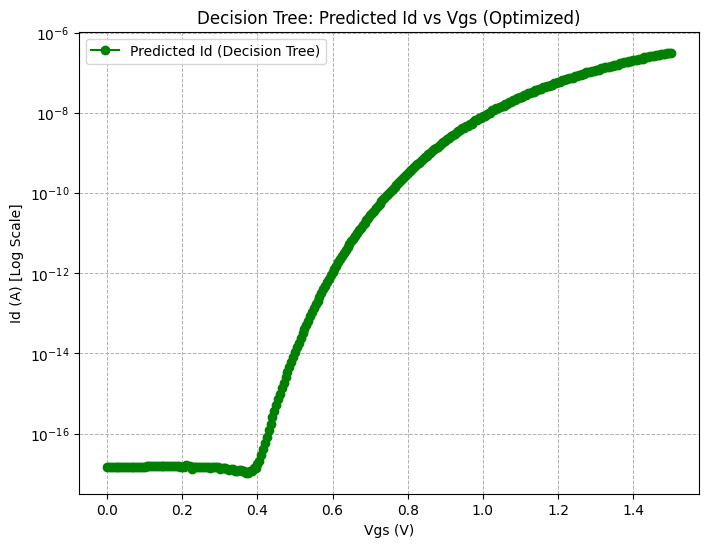

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

# -------------------------------
# Load dataset
# -------------------------------
data = pd.read_excel("New Data.xlsx")

# Features and Target
X = data[["Oxide Thickness", "Gate Length", "Work Function", "Vds", "Vgs"]]
y = data["Id"]

# Ensure numeric and positive
y = pd.to_numeric(y, errors="coerce").fillna(1e-30)
y = y.clip(lower=1e-30)

# Log-transform target for stability
y_log = np.log10(y)

# -------------------------------
# Grid Search for Best Hyperparameters
# -------------------------------
param_grid = {
    "max_depth": [5, 8, 12, 15, 20, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}

grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid.fit(X, y_log)

print("Best Parameters:", grid.best_params_)

# Best Decision Tree model
best_dt = grid.best_estimator_

# -------------------------------
# Training Evaluation
# -------------------------------
y_pred_log = best_dt.predict(X)
y_pred = 10**y_pred_log  # inverse log-transform

r2_train = r2_score(y, y_pred)
mse_train = mean_squared_error(y, y_pred)
mape_train = mean_absolute_percentage_error(y, y_pred)

print("Training R²:", r2_train)
print("Training MSE:", mse_train)
print("Training MAPE:", mape_train)

# -------------------------------
# Testing Input Prediction
# -------------------------------
oxide_test = 1
gate_test = 45
work_func_test = 4.55
vds_test = 0.75
vgs_test = np.arange(0, 1.505, 0.005)

X_test = pd.DataFrame({
    "Oxide Thickness": [oxide_test]*len(vgs_test),
    "Gate Length": [gate_test]*len(vgs_test),
    "Work Function": [work_func_test]*len(vgs_test),
    "Vds": [vds_test]*len(vgs_test),
    "Vgs": vgs_test
})

pred_test_log = best_dt.predict(X_test)
pred_test = 10**pred_test_log

# -------------------------------
# Plot Id vs Vgs
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(vgs_test, pred_test, "go-", label="Predicted Id (Decision Tree)")
plt.yscale("log")
plt.xlabel("Vgs (V)")
plt.ylabel("Id (A) [Log Scale]")
plt.title("Decision Tree: Predicted Id vs Vgs (Optimized)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()

# -------------------------------
# Save Predictions
# -------------------------------
df_test = pd.DataFrame({
    "Vgs": vgs_test,
    "Predicted_Id": pred_test
})
df_test.to_excel("DecisionTree_Testing_Input_Predictions_Optimized_Three.xlsx", index=False)


Comparison R²: -0.194071567557089
Comparison MSE: 1.6173505205213934e-11
Comparison MAPE: 0.7704220430856338


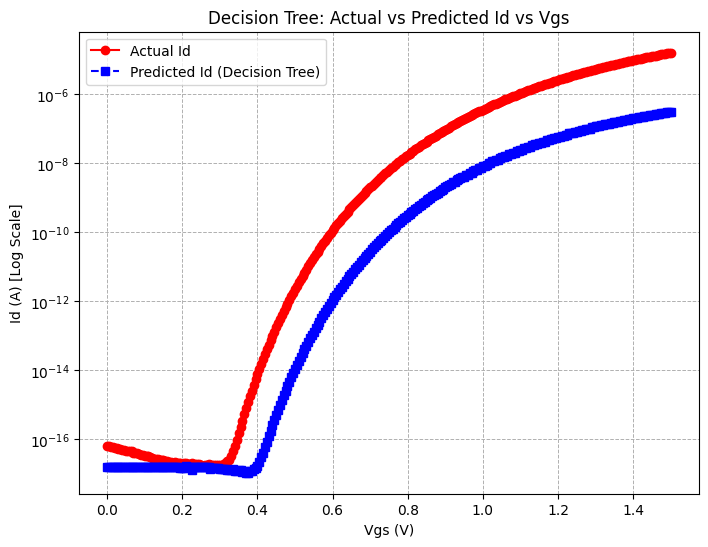

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# -------------------------------
# Actual Id values (given)
# -------------------------------

# Actual Id values (updated array)
actual_Id = np.array([
    6.3197235700e-17, 6.1395726840e-17, 5.9946678640e-17, 5.7466357290e-17,
    5.7126907250e-17, 5.4150530690e-17, 5.2949510850e-17, 5.0625839210e-17,
    4.9503144220e-17, 4.8550152580e-17, 4.6631158240e-17, 4.4699109960e-17,
    4.4150795620e-17, 4.3967996000e-17, 4.0417240690e-17, 3.9425087630e-17,
    3.8981206590e-17, 3.6474779090e-17, 3.5678437820e-17, 3.4999583530e-17,
    3.3106698780e-17, 3.1657653310e-17, 3.1735936770e-17, 2.9608078760e-17,
    2.8380953260e-17, 2.7192990160e-17, 2.5887540360e-17, 2.6409663620e-17,
    2.4281806260e-17, 2.5051957530e-17, 2.4294780110e-17, 2.3172088240e-17,
    2.3498400740e-17, 2.1749112680e-17, 2.2232074540e-17, 2.0900517680e-17,
    2.2023130300e-17, 2.0508816380e-17, 2.0587101860e-17, 2.0704549720e-17,
    1.8707234740e-17, 2.0861121250e-17, 1.9842863420e-17, 1.9438148050e-17,
    1.9098703260e-17, 1.9829694150e-17, 1.7662676650e-17, 1.8863615090e-17,
    1.8994118060e-17, 1.9672893020e-17, 1.7897498730e-17, 1.6618160050e-17,
    1.7531908990e-17, 1.7505763390e-17, 1.8941676240e-17, 1.7623175700e-17,
    1.7949490900e-17, 1.8393293030e-17, 1.7505577840e-17, 1.7583865590e-17,
    1.8249587590e-17, 1.7988469140e-17, 1.8432271760e-17, 2.0860296530e-17,
    2.2792265880e-17, 2.5141966280e-17, 3.2987439660e-17, 4.5976225530e-17,
    6.4656595760e-17, 9.6364950270e-17, 1.4775887620e-16, 2.2507822960e-16,
    3.4551525020e-16, 5.2337722320e-16, 7.9268311340e-16, 1.1879087790e-15,
    1.7587250410e-15, 2.5811458790e-15, 3.7502573020e-15, 5.3982189420e-15,
    7.6960916250e-15, 1.0880585210e-14, 1.5253314490e-14, 2.1206789930e-14,
    2.9267652780e-14, 4.0095917930e-14, 5.4552045890e-14, 7.3707594890e-14,
    9.8968712600e-14, 1.3206445270e-13, 1.7519547410e-13, 2.3112278260e-13,
    3.0324655150e-13, 3.9566883360e-13, 5.1389098890e-13, 6.6380750140e-13,
    8.5404653870e-13, 1.0928934290e-12, 1.3933176740e-12, 1.7668302150e-12,
    2.2322609030e-12, 2.8097934910e-12, 3.5214215410e-12, 4.3967629740e-12,
    5.4681282090e-12, 6.7738447000e-12, 8.3655414610e-12, 1.0291884670e-11,
    1.2612515800e-11, 1.5417567270e-11, 1.8783943940e-11, 2.2798941800e-11,
    2.7588811090e-11, 3.3281098890e-11, 4.0038735760e-11, 4.8012567790e-11,
    5.7415555440e-11, 6.8483637250e-11, 8.1449432940e-11, 9.6538984910e-11,
    1.1419981720e-10, 1.3473254890e-10, 1.5858057640e-10, 1.8606379410e-10,
    2.1786785480e-10, 2.5449869930e-10, 2.9660132700e-10, 3.4479300680e-10,
    3.9994651100e-10, 4.6301113430e-10, 5.3483733390e-10, 6.1602143890e-10,
    7.0860514730e-10, 8.1352818670e-10, 9.3159094340e-10, 1.0648067880e-09,
    1.2153189540e-09, 1.3837399150e-09, 1.5727981950e-09, 1.7847655440e-09,
    2.0210163810e-09, 2.2855612200e-09, 2.5799264670e-09, 2.9061984080e-09,
    3.2695172630e-09, 3.6726085430e-09, 4.1175566980e-09, 4.6107977540e-09,
    5.1540051230e-09, 5.7530187910e-09, 6.4131275040e-09, 7.1372482610e-09,
    7.9326057170e-09, 8.8034717310e-09, 9.7579596150e-09, 1.0801905260e-08,
    1.1942054630e-08, 1.3180734000e-08, 1.4539361610e-08, 1.6007233450e-08,
    1.7608291400e-08, 1.9347472450e-08, 2.1227538010e-08, 2.3268429870e-08,
    2.5477426850e-08, 2.7859591160e-08, 3.0440786200e-08, 3.3216054800e-08,
    3.6214111460e-08, 3.9439102540e-08, 4.2903350760e-08, 4.6633859430e-08,
    5.0635640450e-08, 5.4925260720e-08, 5.9522674330e-08, 6.4448461710e-08,
    6.9719730190e-08, 7.5341362240e-08, 8.1380857780e-08, 8.7786084470e-08,
    9.4640549890e-08, 1.0193577790e-07, 1.0971677270e-07, 1.1797807040e-07,
    1.2676540430e-07, 1.3610936310e-07, 1.4602936230e-07, 1.5654818920e-07,
    1.6769491790e-07, 1.7952981820e-07, 1.9203056180e-07, 2.0526996480e-07,
    2.1927865500e-07, 2.3407023090e-07, 2.4969899380e-07, 2.6619511760e-07,
    2.8354258700e-07, 3.0190269380e-07, 3.2115626440e-07, 3.4153884940e-07,
    3.6290700270e-07, 3.8537141400e-07, 4.0899983530e-07, 4.3377891760e-07,
    4.5976895490e-07, 4.8710653890e-07, 5.1566459250e-07, 5.4565525710e-07,
    5.7701987330e-07, 6.0978006570e-07, 6.4411018240e-07, 6.7999514950e-07,
    7.1743057270e-07, 7.5648260670e-07, 7.9727779820e-07, 8.3978366370e-07,
    8.8402332460e-07, 9.3016749270e-07, 9.7816111860e-07, 1.0281582820e-06,
    1.0801007430e-06, 1.1341098120e-06, 1.1902135500e-06, 1.2484784180e-06,
    1.3089193390e-06, 1.3716762730e-06, 1.4366631410e-06, 1.5042011240e-06,
    1.5740127280e-06, 1.6462987890e-06, 1.7210329990e-06, 1.7983071600e-06,
    1.8784974490e-06, 1.9612943890e-06, 2.0468723860e-06, 2.1348028110e-06,
    2.2260647180e-06, 2.3203507800e-06, 2.4172699450e-06, 2.5172258030e-06,
    2.6204201920e-06, 2.7267744850e-06, 2.8360218010e-06, 2.9485579380e-06,
    3.0648558300e-06, 3.1839998940e-06, 3.3064787630e-06, 3.4331592300e-06,
    3.5624514490e-06, 3.6958200520e-06, 3.8328722280e-06, 3.9731735270e-06,
    4.1173379030e-06, 4.2653461010e-06, 4.4171873120e-06, 4.5729563980e-06,
    4.7323120330e-06, 4.8958817580e-06, 5.0637821700e-06, 5.2350958120e-06,
    5.4108058570e-06, 5.5907461000e-06, 5.7752868390e-06, 5.9632164940e-06,
    6.1559948690e-06, 6.3529705130e-06, 6.5540323220e-06, 6.7599589670e-06,
    6.9701167300e-06, 7.1854073810e-06, 7.4052635220e-06, 7.6288753260e-06,
    7.8574503340e-06, 8.0912013800e-06, 8.3290876160e-06, 8.5716806500e-06,
    8.8191653060e-06, 9.0711195930e-06, 9.3288451570e-06, 9.5906218220e-06,
    9.8572394740e-06, 1.0129049330e-05, 1.0406244170e-05, 1.0688426360e-05,
    1.0975008370e-05, 1.1267068290e-05, 1.1565442000e-05, 1.1867698270e-05,
    1.2175070780e-05, 1.2487650200e-05, 1.2806219090e-05, 1.3129589560e-05,
    1.3456828040e-05, 1.3790588770e-05, 1.4131030860e-05, 1.4475664780e-05,
    1.4825646320e-05, 1.5181295420e-05, 1.5540263670e-05, 1.5906141690e-05,
    1.6276951520e-05
])

# -------------------------------
# Load Predicted Id values from saved Excel
# -------------------------------
pred_df = pd.read_excel("DecisionTree_Testing_Input_Predictions_Optimized_Three.xlsx")
pred_Id = pred_df["Predicted_Id"].values
vgs_test = pred_df["Vgs"].values

# Ensure both arrays have same length
pred_Id = pred_Id[:len(actual_Id)]
vgs_test = vgs_test[:len(actual_Id)]

# -------------------------------
# Merge Actual and Predicted
# -------------------------------
df_compare = pd.DataFrame({
    "Vgs": vgs_test,
    "Actual_Id": actual_Id,
    "Predicted_Id": pred_Id
})

# -------------------------------
# Calculate Metrics
# -------------------------------
r2 = r2_score(df_compare["Actual_Id"], df_compare["Predicted_Id"])
mse = mean_squared_error(df_compare["Actual_Id"], df_compare["Predicted_Id"])
mape = mean_absolute_percentage_error(df_compare["Actual_Id"], df_compare["Predicted_Id"])

print("Comparison R²:", r2)
print("Comparison MSE:", mse)
print("Comparison MAPE:", mape)

# -------------------------------
# Plot Actual vs Predicted Id (Log Scale)
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(df_compare["Vgs"], df_compare["Actual_Id"], "ro-", label="Actual Id")
plt.plot(df_compare["Vgs"], df_compare["Predicted_Id"], "bs--", label="Predicted Id (Decision Tree)")
plt.yscale("log")
plt.xlabel("Vgs (V)")
plt.ylabel("Id (A) [Log Scale]")
plt.title("Decision Tree: Actual vs Predicted Id vs Vgs")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()

# -------------------------------
# Save merged results
# -------------------------------
df_compare.to_excel("DecisionTree_Actual_vs_Predicted_Id.xlsx", index=False)
